<img src="stadium.jpg">

# Statistical Analysis of European Football Markets in Python
## Saif Bhatti

### Abstract

This research is attempt to analyse the trends in the European Football Markets for the 'Big 5' leagues, and question whether the market is inflated and player value is overrated. The 'Big 5' leagues are the top leagues in each of England, Spain, Germany, Italy and France. 

Given the various influxes of capital into markets from various sources including Premier League TV Revenue deal, acquisition from overseas 

The hypothesis is 




On the question of have players improved -> look at their key statistics broken down by the position they play. This would include metrics such as touches, interceptions, shots, goals, versus their historic performance and other players in the same position, to determine how performance influences valuation.
~\\
~\\
On player value, compare performance history with valuations and sold prices for transfered players. This can be lo


Primarily based around a visualisation of time versus spend for Europe's top 5 leagues. The main idea conveyed is that in a post-Neymar-to-Paris world, how has the market been affected? Pre-calculation hypothesis is that now players are much greater prices - and why? Because more money has been pumped into the system, with TV revenue, ownership funds and a handful of clubs deciding to float on the stock market. We are seeing a culmination of a chain of events that began back in the Sir Alex Ferguson Era, when the Glazers took over club ownership. When Roman Abramovich picked up the helm at Chelsea, and more recently King Power-ing Leicester City to a league title.


### Importing Football Dataset and Data organisation

#### This dataset was scraped with BeautifulSoup4 and SoccerTransfers.net.

The only pre-processing was to remove all 'Free' and 'Loan' transfers and compile multiple scrapes into one dataframe. The `'Actual_price'` column is in Euros (€)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

football = pd.read_csv('Football_Data.csv')
# df.describe(include='all')
del football['Index']
football.head(20)

,When,Player,Position,From,To,Actual_price,Year,League,World Record
0,Jan-31,Lucas Moura,Attacker,PSG,Tottenham,28400000,2017-2018,EPL,No
1,Jan-31,Olivier Giroud,Attacker,Arsenal,Chelsea,17000000,2017-2018,EPL,No
2,Jan-31,Pierre-Emerick Aubameyang,Attacker,Borussia Dortmund,Arsenal,63750000,2017-2018,EPL,No
3,Jan-31,Andre Ayew,Attacker,West Ham United,Swansea City,22800000,2017-2018,EPL,No
4,Jan-31,Badou NDiaye,Midfielder,Galatasaray,Stoke City,16000000,2017-2018,EPL,No
5,Jan-30,Jack Harrison,Attacker,New York City FC,Manchester City,4000000,2017-2018,EPL,No
6,Jan-30,Emerson,Defender,AS Roma,Chelsea,20000000,2017-2018,EPL,No
7,Jan-29,Aymeric Laporte,Defender,Athletic Bilbao,Manchester City,65000000,2017-2018,EPL,No
8,Jan-25,Guido Carrillo,Attacker,Monaco,Southampton,22000000,2017-2018,EPL,No
9,Jan-23,Jaroslaw Jach,Defender,Zaglebie Lubin,Crystal Palace,3000000,2017-2018,EPL,No


### Data Cleaning

Removed all the incorrect "JAN" tags on various players from the 2017-18 season.

In [4]:
my_list = football["Player"].tolist()
new_list=[]
for player in my_list:
    jan_finder = player[(len(player)-3):]
    if jan_finder == "Jan": 
        player = player[:(len(player)-3)]
    new_list.append(player)
#         print (player)

new_list = pd.Series(new_list)
football['Player'] = new_list.values
football.head(20)

,When,Player,Position,From,To,Actual_price,Year,League,World Record
0,Jan-31,Lucas Moura,Attacker,PSG,Tottenham,28400000,2017-2018,EPL,No
1,Jan-31,Olivier Giroud,Attacker,Arsenal,Chelsea,17000000,2017-2018,EPL,No
2,Jan-31,Pierre-Emerick Aubameyang,Attacker,Borussia Dortmund,Arsenal,63750000,2017-2018,EPL,No
3,Jan-31,Andre Ayew,Attacker,West Ham United,Swansea City,22800000,2017-2018,EPL,No
4,Jan-31,Badou NDiaye,Midfielder,Galatasaray,Stoke City,16000000,2017-2018,EPL,No
5,Jan-30,Jack Harrison,Attacker,New York City FC,Manchester City,4000000,2017-2018,EPL,No
6,Jan-30,Emerson,Defender,AS Roma,Chelsea,20000000,2017-2018,EPL,No
7,Jan-29,Aymeric Laporte,Defender,Athletic Bilbao,Manchester City,65000000,2017-2018,EPL,No
8,Jan-25,Guido Carrillo,Attacker,Monaco,Southampton,22000000,2017-2018,EPL,No
9,Jan-23,Jaroslaw Jach,Defender,Zaglebie Lubin,Crystal Palace,3000000,2017-2018,EPL,No


In [5]:
#converting strings of actual price to floats
def convert_to_float():
    new_value_list=[]
    for value in football['Actual_price']:
        value=float(value)
        new_value_list.append(value)
    new_value_list = pd.Series(new_value_list)
    football['Actual_price'] = new_value_list.values
        
convert_to_float()        

#Post the World Record Rankings
world_record = football.sort_values('Actual_price',ascending=False)
world_record.head(10)
# Search the Players column for Neymar
# football[football['Player'].str.match('Ney')]

,When,Player,Position,From,To,Actual_price,Year,League,World Record
292,Aug-03,Neymar,Attacker,Barcelona,PSG,222000000.0,2017-2018,Euro,Yes
100,Jan-06,Philippe Coutinho,Midfielder,Liverpool,Barcelona,160000000.0,2017-2018,LLGA,No
439,Aug-09,Paul Pogba,Midfielder,Juventus,Manchester Utd,105000000.0,2016-2017,EPL,Yes
105,Aug-25,Ousmane Dembele,Attacker,Bor. Dortmund,Barcelona,105000000.0,2017-2018,LLGA,No
1374,Sep-02,Gareth Bale,Midfielder,Tottenham,Real Madrid,100000000.0,2013-2014,LLGA,Yes
1155,Jul-11,Luis Suarez,Attacker,Liverpool,Barcelona,95000000.0,2014-2015,LLGA,No
2193,Jan-19,Cristiano Ronaldo,Attacker,Manchester United,Real Madrid,93900000.0,2009-2010,LLGA,Yes
608,Jul-26,Gonzalo Higuain,Attacker,Napoli,Juventus,90000000.0,2016-2017,ITY,No
61,Jul-10,Romelu Lukaku,Attacker,Everton,Manchester United,84700000.0,2017-2018,EPL,No
1149,Jul-22,James Rodriguez,Midfielder,Monaco,Real Madrid,80000000.0,2014-2015,LLGA,No


---

### Plotting the World Transfer Record


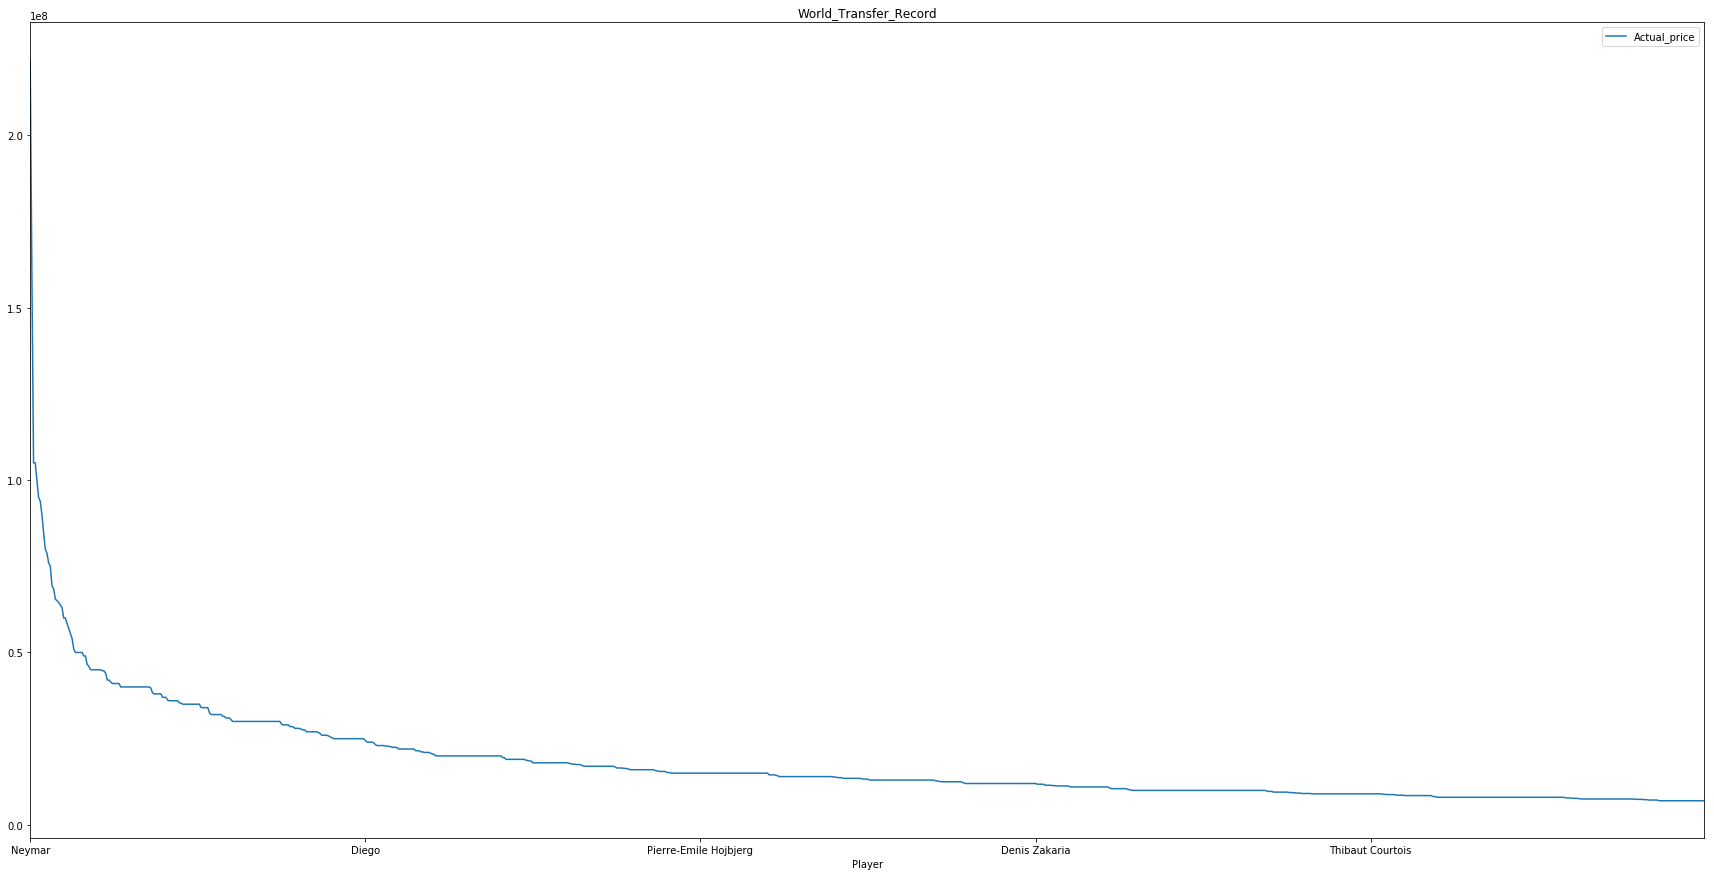

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline



# plt.scatter(football['Player'],football['Actual_price'])
# plt.show()
world_record.iloc[0:1000].plot(y='Actual_price',x='Player',title='World_Transfer_Record', figsize=(30,15))

plt.show()
# data.iloc[499:999].plot(y='value')

---

### Pareto Principle

Does 20% of the world's highest transfer targets equate to roughly 80% of the value? Let's find out.

In [7]:
def pareto():
    twentieth_percentile = int(round(world_record.shape[0] * 0.20))
    player_total = world_record.shape[0]
    numerator = world_record['Actual_price'].iloc[1:twentieth_percentile].sum()
#     denominator = world_record['Actual_price'].iloc[twentieth_percentile:].sum()
    denominator = world_record['Actual_price'].sum()
    top_twenty_ratio = numerator/denominator * 100
    
    top_numerator = world_record['Actual_price'].iloc[1:95].sum()
    top_denominator = world_record['Actual_price'].iloc[1:477].sum()
#     print(top_numerator)
#     print(top_denominator)
    top_of_top = top_numerator/top_denominator * 100
          
    return print("Of the top 20% ({0}) of all players ({1}), the ratio of value is {2}. However, within the top 20% (95) of these players, the ratio of value is {3}, which is even further from the required ratio.".format(world_record.iloc[0:twentieth_percentile].shape[0], world_record.shape[0],top_twenty_ratio,top_of_top))

pareto()

Of the top 20% (477) of all players (2384), the ratio of value is 56.358748611148066. However, within the top 20% (95) of these players, the ratio of value is 37.675613687325864, which is even further from the required ratio.


The **Pareto Principle did not hold** for this dataset. The result from the above function is reiterated below:

Of the top 20% (477) of all players (2384), the ratio of value is 56.358748611148066. 

However, within the top 20% (95) of these players, the ratio of value is 37.675613687325864, which is even further from the required ratio.

This make sense because despite top transfers increasing over x% in the past 10 years, this lends credence to the theory that the market as a whole has inflated and is oversaturated with money.

 ---

### Price Movement

Evaluating players price movement over time by isolating players who have had multiple transfers.

In [8]:
football['Player'].drop_duplicates()

football.shape

(2384, 9)

#### Trends in the Market

A trend is a time-dependent change in system behavior.
